# TP1 Submission

Author: Ramy Ghorayeb

Date: November 2018

## Ex1: Dynamic Programming

### Q1: MDP

In [1]:
# Loading

import numpy as np

# States & Actions

S = ['s0','s1','s2']
A = ['a0','a1','a2']

# Transition Matrix

P = np.array([[[0.55, 0.3, 1],[0.45, 0.7, 0],[0, 0, 0]],
              [[1, 0, 0],[0, 0.4, 1],[0, 0.6, 0]],
              [[0, 0, 0],[1, 0.6, 0],[0, 0.4, 1]]])

# Reward Matrix

R = np.array([
    [0,0,5/100],
    [0,0,0],
    [0,1,9/10]
    ])

print(' ----- States & Actions ----- \n\n',S,'\n\n',A)
print('\n ----- Transition matrix ----- \n\n',P)
print('\n ----- Reward matrix ----- \n\n',R)

 ----- States & Actions ----- 

 ['s0', 's1', 's2'] 

 ['a0', 'a1', 'a2']

 ----- Transition matrix ----- 

 [[[0.55 0.3  1.  ]
  [0.45 0.7  0.  ]
  [0.   0.   0.  ]]

 [[1.   0.   0.  ]
  [0.   0.4  1.  ]
  [0.   0.6  0.  ]]

 [[0.   0.   0.  ]
  [1.   0.6  0.  ]
  [0.   0.4  1.  ]]]

 ----- Reward matrix ----- 

 [[0.   0.   0.05]
 [0.   0.   0.  ]
 [0.   1.   0.9 ]]


Intuitively, the optimal policy is from $S0$ to do $a0$ until $S1$ is reached then do $a1$ until $S2$ is reached then repeat $a2$.

### Q2: Value Iteration

In [9]:
import matplotlib.pyplot as plt

epsilon = 0.01
gamma = 0.95
epsilon = 0.01
threshold = (2*epsilon*gamma)/(1-gamma)

n_actions, n_states = R.shape
V = np.ones((n_states,1))
V_prev = np.zeros((n_states,1))
V_k = []
error = []
pi = np.zeros(n_states)

iteration = 0

while (np.linalg.norm(V-V_prev)) >= epsilon:
    V_prev = np.copy(V)
    
    for i_state in range(n_states):
        iteration = iteration + 1
        
        poss_values = R[i_state] + gamma * (P[i_state].T.dot(V_prev)).T
        V[i_state] = np.max(poss_values)
        pi[i_state] = np.argmax(poss_values)
    
    error.append((np.linalg.norm(V-V_prev)))

print('number of iterations: ',iteration,'\n')        
print('pi: ',pi,'\n')

number of iterations:  297 

pi:  [1. 1. 2.] 



Text(0.5,1,'Convergence of the value iteration algorithm')

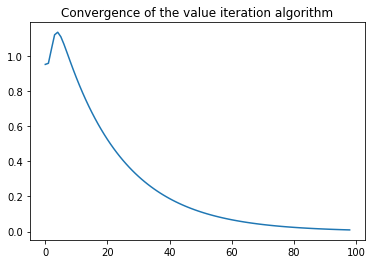

In [10]:

plt.plot(error)
plt.title('Convergence of the value iteration algorithm')

### Q3: Policy Iteration

number of iterations:  6 

pi:  [1 1 2] 



Text(0.5,1,'Convergence of the policy iteratio algorithm')

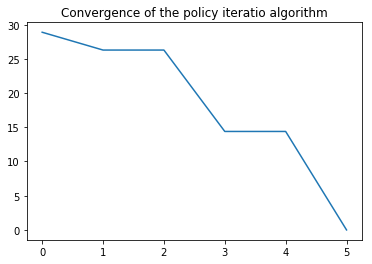

In [3]:
pi = np.array([1,1,2])

error = []
iteration = 0
V_prev = np.ones(n_states)
V = np.zeros(n_states)

while (not(np.array_equal(V,V_prev))):
    iteration = iteration + 1
    V_prev = np.copy(V)    
    Invert_part = np.linalg.inv((np.eye(n_states) - gamma * np.array([[P[i,j,pi[i]] for j in range(n_states)] for i in range(n_states)])))
    R_part = np.array([R[i,pi[i]] for i in range(n_states)])
    V = Invert_part.dot(R_part)
    
    for i_state in range (n_states):
        poss_values = R[i_state] + gamma * (P[i_state].T.dot(V_prev)).T
        pi[i_state] = np.argmax(poss_values)
        
    error.append(np.linalg.norm(V-V_prev))

print('number of iterations: ',iteration,'\n')        
print('pi: ',pi,'\n')

plt.plot(error)
plt.title('Convergence of the policy iteratio algorithm') 

The convergence of the policy iteration is much **faster** than for then value iteration, but each iteration is **computationnally more expensive**.

The convergence of the policy iteration is also **exact**, while the one for the value iteration is **asymptotic**.

## Ex2: Reinforcement Learning

### Q1

Sampling and evaluation of the distribution of $\mu$

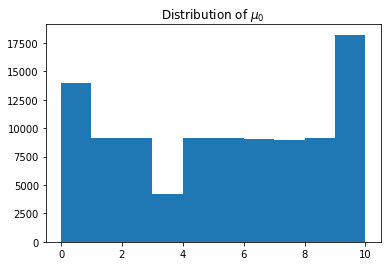

In [4]:
from gridworld import GridWorld1

env = GridWorld1

def evaluate_dist_mu(env,iterations):
    mu0 = [env.reset() for i in range(iterations)]
    return mu0

mu0 = evaluate_dist_mu(env,100000)
plt.figure()
plt.title('Distribution of $\mu_0$')
plt.hist(mu0)
plt.show()

Building of the estimator

In [5]:
env = GridWorld1

def policy(actions, s): #return action associated to the state and policy
    if 0 in actions:
        return 0
    return 3

def simulation(env,policy): #simulate a trajectory and record r,s,a 
    
    s = env.reset()
    end = False
    rewards, states, actions = [],[],[]
    i = 0
    while not end:
        a = policy(env.state_actions[s],s)
        s, r, end = env.step(s,a)
        rewards.append(r)
        states.append(s)
        actions.append(a)
        i = i+1
    return rewards, states, actions

def all_simulation(env, policy, n_states): #record the n simulations
    
    all_rewards, all_states, all_actions = [],[],[]
    for i in range(n_states):
        r, s, a = simulation(env,policy)
        all_rewards.append(r)
        all_states.append(s)
        all_actions.append(a)
        
    return all_rewards, all_states, all_actions
        
def s_traj(s, all_states): #find all the trajectories starting from a specific state, record 
    traj = []
    
    for i,i_state in enumerate(all_states):
        if i_state[0] == s:
            traj.append(i)
            
    return traj

def s_simulation(s, all_rewards, all_states, all_actions): # return the r,s,a of all the trajectories starting from a specific state
    
    s_rewards, s_states, s_actions = [],[],[]
    traj = s_traj(s, all_states)
    
    for i,k in enumerate(traj):

        s_rewards.append(all_rewards[k])
        s_states.append(all_states[k])
        s_actions.append(all_actions[k])
        
    return s_rewards, s_states, s_actions

def s_value(gamma, s_rewards):
    s_val = 0
    
    if len(s_rewards) != 0:
    
        for k in range(len(s_rewards)):
            for t in range(len(s_rewards[k])):
                s_val = s_val + gamma**(t-1)*s_rewards[k][t]
        s_val = (1/len(s_rewards)) * s_val
    
    return s_val
            
            
def all_values(env, policy, n_states): # calculate the value function and mu0 distribution of the states after n simulations
    V, mu0 = np.zeros((n_states,env.n_states)),np.zeros(env.n_states)
    all_rewards, all_states, all_actions = all_simulation(env, policy, n_states)
    
    for n in range(n_states):
        for s in range(env.n_states):
            
            s_rewards, s_states, s_actions = s_simulation(s,all_rewards[:n], all_states[:n], all_actions[:n])
            V[n][s] = s_value(gamma, s_rewards[:n])
            mu0[s] = len(s_traj(s, all_states[:n]))        
    
    return V, mu0

Text(0.5,1,'Policy evaluation (Jn-J0)')

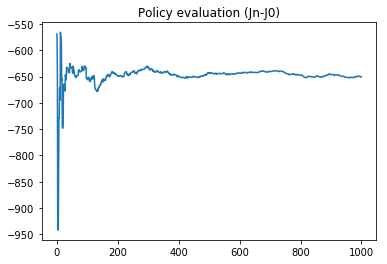

In [6]:
def one_eval(env, policy, V, V_pi, mu0): # evaluate after a certain number of simulations 
    
    Jn = sum(np.multiply(V,mu0))
    J0 = sum(np.multiply(V_pi,mu0))
    
    return Jn-J0

def all_eval(env, policy, V_pi, n_states): # record evaluation after each simulation
    evals = []
    V, mu0 = all_values(env, policy, n_states)    
    for n in range(n_states):
        val = one_eval(env, policy, V[n], V_pi, mu0)
        evals.append(val)
    return evals

V_pi = np.array([0.877,0.928,0.988,0,0.671, 0.994,0, 0.828, 0.877, 0.934, 0.994])
n_states = 1000

evals = all_eval(env, policy, V_pi, n_states)

plt.plot(evals)
plt.title('Policy evaluation (Jn-J0)') 

### Q5

The learning rate must follow the Robbins-Monro conditions to provide convergence properties. Here, it is chosen to $\frac{1}{N(s,a)}$ as $\sum_{s,a} \frac{1}{N(s,a)} = +\infty$, while $\sum_{s,a} \frac{1}{N(s,a)} ; +\infty$.

**Q-learning:**

In [119]:
env = GridWorld1
epsilon = 0.1
gamma = 0.95

def action_next(Pi, s, actions, epsilon): #return action from exploration
    
    a = int(Pi[s])
    
    if a not in actions or np.random.random() < epsilon and actions != [a]:
        a = np.random.choice(list(set(actions) - set([a])))

    return a

def episode(env, Q, Pi, n_visits, epsilon, gamma):
    
    s = env.reset()
    Q_new = Q.copy()    
    end = False
    n_actions = len(env.action_names)
    
    while not end:
        actions = env.state_actions[s]
        a = action_next(Pi, s, actions, epsilon)

        n_visits[s, a] = n_visits[s, a] + 1
        alpha = 1/n_visits[s, a]
        
        s_new, r, end = env.step(s, a)
        
        Q_new[s, a] = (1-alpha)*Q_new[s, a] + alpha*(r + gamma*np.max(Q_new[s_new]))
        Pi[s] = np.argmax(Q_new[s])        
        s = s_new
        
    return Q_new, Pi, n_visits

def learning(env, gamma, epsilon, n_iteration):
    
    Q = np.zeros((env.n_states, len(env.action_names)))
    Pi = np.zeros(env.n_states)
    n_visits = np.zeros((env.n_states, len(env.action_names)))
    Qs, Pis = [], []
    
    for n in range(n_iterations):
        Q, Pi, n_visits = episode (env, Q, Pi, n_visits, epsilon, gamma)
        Qs.append(Q)
        Pis.append(Pi)

    return Qs,Pis

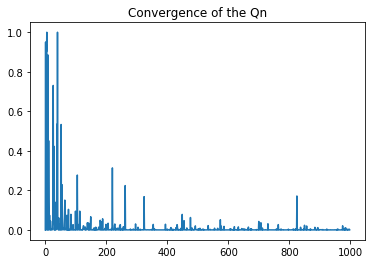

In [120]:
n_iterations = 1000

Qs, Pis = learning(env, gamma, epsilon, n_iterations)

conv = []
for i in range(1, len(Qs)):
    conv.append(np.max(np.abs(Qs[i] - Qs[i-1])))

plt.plot(conv)
plt.title('Convergence of the Qn')
plt.show()

Text(0.5,1,'Convergence of Vpi-Vn')

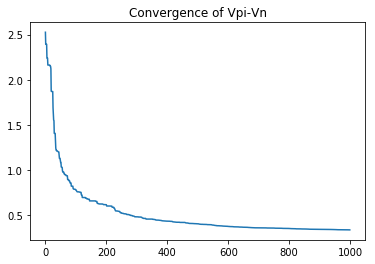

In [102]:
n_iterations = 1000
Qs, Pis = learning(env, gamma, epsilon, n_iterations)
Vs= np.zeros(env.n_states)
V_pi = np.array([0.877,0.928,0.988,0,0.671, 0.994,0, 0.828, 0.877, 0.934, 0.994])
conv = []

for n in range(n_iterations):
    for i in range(env.n_states):
        Vs[i] = max(Qs[n][i])
    conv.append(np.linalg.norm(V_pi - Vs))

plt.plot(conv)
plt.title('Convergence of Vpi-Vn') 

We can see the convergence to 0.

**Reward cumulated over the episodes:**

Text(0.5,1,'Reward cumulated over the episodes')

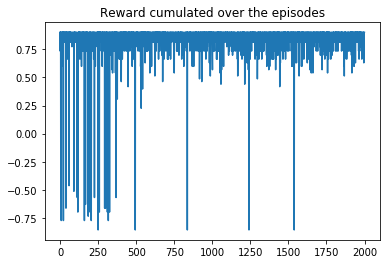

In [185]:
def episode_r(env, Q, Pi, n_visits, epsilon, gamma):
    
    s = new_reset()
    Q_new = Q.copy()    
    end = False
    n_actions = len(env.action_names)
    r_sum = 0
    t = 1
    
    while not end:
        actions = env.state_actions[s]
        a = action_next(Pi, s, actions, epsilon)

        n_visits[s, a] = n_visits[s, a] + 1
        alpha = 1/n_visits[s, a]
        
        s_new, r, end = env.step(s, a)
        
        Q_new[s, a] = (1-alpha)*Q_new[s, a] + alpha*(r + gamma*np.max(Q_new[s_new]))
        Pi[s] = np.argmax(Q_new[s])        
        s = s_new
        r_sum = r_sum + gamma**(t-1)*r
        t = t+1
      
    return Q_new, Pi, n_visits, r_sum

def learning_r(env, gamma, epsilon, n_iteration):
    
    Q = np.zeros((env.n_states, len(env.action_names)))
    Pi = np.zeros(env.n_states)
    n_visits = np.zeros((env.n_states, len(env.action_names)))
    Qs, Pis, r_cumul = [], [], []
    
    for n in range(n_iterations):
        Q, Pi, n_visits, r_sum = episode_r(env, Q, Pi, n_visits, epsilon, gamma)
        Qs.append(Q)
        Pis.append(Pi)
        r_cumul.append(r_sum)

    return Qs,Pis,r_cumul

n_iterations = 2000
Qs, Pis, r_cumul = learning_r(env, gamma, epsilon, n_iterations)

plt.plot(r_cumul)
plt.title('Reward cumulated over the episodes') 

The evolution of the reward is not very visible. Let's roll each iteration and average the cumulated reward:

Text(0.5,1,'Mean reward cumulated over the episodes')

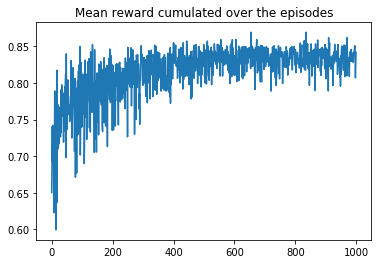

In [189]:
n_iterations = 1000
n_rolling = 100

Qs, Pis = np.zeros((n_rolling,n_iterations,)), np.zeros((n_rolling,n_iterations))
r_cumul = []
r_mean = []

for n in range(n_rolling):
    Qs, Pis, r_cumul_temp = learning_r(env, gamma, epsilon, n_iterations)
    r_cumul.append(r_cumul_temp)
    
r_cumul = np.array(r_cumul)
r_mean = np.mean(r_cumul,axis=0)
    
plt.plot(r_mean)
plt.title('Mean reward cumulated over the episodes') 

We can see the cumulated reward getting higher over time.

### Q6

The initial distribution does not affect the optimal policy. The computed policies will vary but will ultimately coverge to the optimal policy. Let's change the reset function aka the initial distribution to prove it: 

Text(0.5,1,'Convergence of Vpi-Vn')

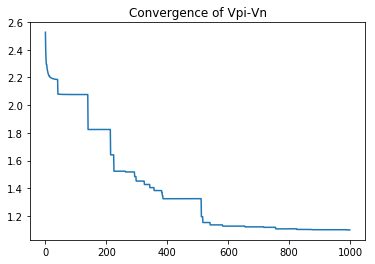

In [126]:
def new_reset():
    return 0 #always start at the state 0

def new_episode(env, Q, Pi, n_visits, epsilon, gamma): #same than before with the reset changed
    
    s = new_reset() #change it here
    Q_new = Q.copy()    
    end = False
    n_actions = len(env.action_names)
    
    while not end:
        actions = env.state_actions[s]
        a = action_next(Pi, s, actions, epsilon)

        n_visits[s, a] = n_visits[s, a] + 1
        alpha = 1/n_visits[s, a]
        
        s_new, r, end = env.step(s, a)
        
        Q_new[s, a] = (1-alpha)*Q_new[s, a] + alpha*(r + gamma*np.max(Q_new[s_new]))
        Pi[s] = np.argmax(Q_new[s])        
        s = s_new
        
    return Q_new, Pi, n_visits

def new_learning(env, gamma, epsilon, n_iteration):
    
    Q = np.zeros((env.n_states, len(env.action_names)))
    Pi = np.zeros(env.n_states)
    n_visits = np.zeros((env.n_states, len(env.action_names)))
    Qs, Pis = [], []
    
    for n in range(n_iterations):
        Q, Pi, n_visits = new_episode (env, Q, Pi, n_visits, epsilon, gamma)
        Qs.append(Q)
        Pis.append(Pi)

    return Qs,Pis

n_iterations = 1000
Qs, Pis = new_learning(env, gamma, epsilon, n_iterations)
Vs= np.zeros(env.n_states)
V_pi = np.array([0.877,0.928,0.988,0,0.671, 0.994,0, 0.828, 0.877, 0.934, 0.994])
conv = []

for n in range(n_iterations):
    for i in range(env.n_states):
        Vs[i] = max(Qs[n][i])
    conv.append(np.linalg.norm(V_pi - Vs))

plt.plot(conv)
plt.title('Convergence of Vpi-Vn') 

We can see the convergence.

We can calculate the cumulated rewards:

Text(0.5,1,'Mean reward cumulated over the episodes')

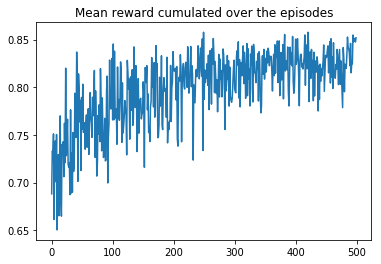

In [190]:
def new_episode_r(env, Q, Pi, n_visits, epsilon, gamma):
    
    s = new_reset()
    Q_new = Q.copy()    
    end = False
    n_actions = len(env.action_names)
    r_sum = 0
    t = 1
    
    while not end:
        actions = env.state_actions[s]
        a = action_next(Pi, s, actions, epsilon)

        n_visits[s, a] = n_visits[s, a] + 1
        alpha = 1/n_visits[s, a]
        
        s_new, r, end = env.step(s, a)
        
        Q_new[s, a] = (1-alpha)*Q_new[s, a] + alpha*(r + gamma*np.max(Q_new[s_new]))
        Pi[s] = np.argmax(Q_new[s])        
        s = s_new
        r_sum = r_sum + gamma**(t-1)*r
        t = t+1
      
    return Q_new, Pi, n_visits, r_sum

def new_learning_r(env, gamma, epsilon, n_iteration):
    
    Q = np.zeros((env.n_states, len(env.action_names)))
    Pi = np.zeros(env.n_states)
    n_visits = np.zeros((env.n_states, len(env.action_names)))
    Qs, Pis, r_cumul = [], [], []
    
    for n in range(n_iterations):
        Q, Pi, n_visits, r_sum = new_episode_r(env, Q, Pi, n_visits, epsilon, gamma)
        Qs.append(Q)
        Pis.append(Pi)
        r_cumul.append(r_sum)

    return Qs,Pis,r_cumul

n_iterations = 500
n_rolling = 100

Qs, Pis = np.zeros((n_rolling,n_iterations,)), np.zeros((n_rolling,n_iterations))
r_cumul = []
r_mean = []

for n in range(n_rolling):
    Qs, Pis, r_cumul_temp = new_learning_r(env, gamma, epsilon, n_iterations)
    r_cumul.append(r_cumul_temp)
    
r_cumul = np.array(r_cumul)
r_mean = np.mean(r_cumul,axis=0)
    
plt.plot(r_mean)
plt.title('Mean reward cumulated over the episodes') 

We can see the cumulated reward getting higher over time.